IF you were to invest in 5 companies who had IPOS in 2019 would you want to know the risk of those companies? Calculate the volatility between 5 companies who IPOs occurred in 2019. Also do a brief risk analysis of each company in the portfolio. We will assume the follwing companies were invested in and that the portfolio is equally weighted

In [6]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt

Uber, Beyond Meat, LYFT, Pinterst, ZOOM

In [12]:
tickers = ["UBER", "ZM", "PINS", "BYND", "LYFT"]
data_frame = pd.DataFrame()
for t in tickers:
    data_frame[t] = web.DataReader(t, data_source = "yahoo", start = "2019-1-1")["Adj Close"]

In [13]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 135 entries, 2019-05-10 to 2019-11-19
Data columns (total 5 columns):
UBER    135 non-null float64
ZM      135 non-null float64
PINS    135 non-null float64
BYND    135 non-null float64
LYFT    135 non-null float64
dtypes: float64(5)
memory usage: 6.3 KB


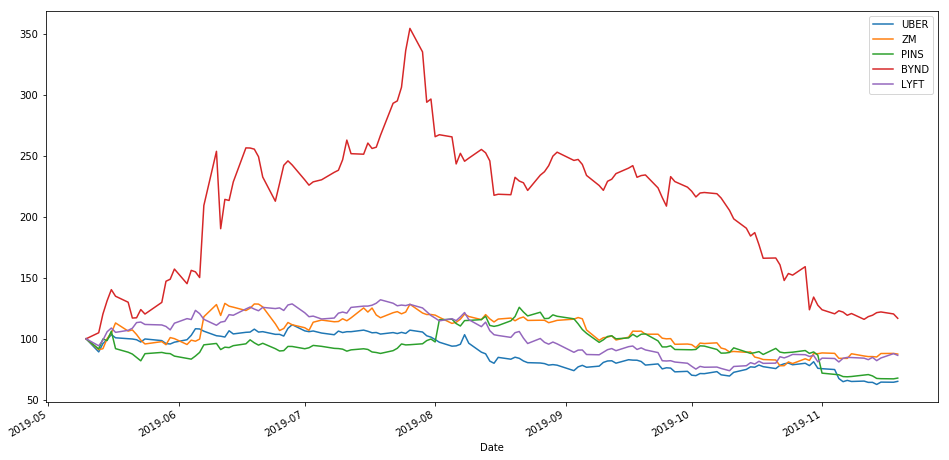

In [14]:
#lets see the behavior of the stocks so far by normalizing the data 
(data_frame/data_frame.iloc[0] * 100).plot(figsize = (16,8))
plt.show()

calculate the returns for the securties in the portfolio

In [15]:
simple_returns = (data_frame/data_frame.shift(1)) - 1

In [17]:
simple_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 135 entries, 2019-05-10 to 2019-11-19
Data columns (total 5 columns):
UBER    134 non-null float64
ZM      134 non-null float64
PINS    134 non-null float64
BYND    134 non-null float64
LYFT    134 non-null float64
dtypes: float64(5)
memory usage: 6.3 KB


In [18]:
simple_returns.tail()

,UBER,ZM,PINS,BYND,LYFT
Date,,,,,
2019-11-13,0.000374,0.000147,-0.015595,0.009518,0.022915
2019-11-14,-0.026956,-0.003970,-0.029703,0.017908,-0.031871
2019-11-15,0.030781,0.033511,-0.003061,0.004725,0.026718
2019-11-18,-0.001493,0.001000,-0.002047,-0.013488,0.042286
2019-11-19,0.011215,-0.006279,0.009231,-0.029729,-0.015827


Calculate the Risk for each security in the portfolio

In [21]:
uber_risk = simple_returns["UBER"].std() * 250 ** 0.5
uber_risk

0.3511801373150022

In [24]:
zoom_risk = simple_returns["ZM"].std() * 250 ** 0.5
zoom_risk

0.6020521671429016

In [26]:
pinterest_Risk = simple_returns["PINS"].std() * 250 ** 0.5
pinterest_Risk

0.597865906454312

In [28]:
beyond_risk = simple_returns["BYND"].std() * 250 ** 0.5
beyond_risk

1.0874535349166212

In [30]:
lyft_risk = simple_returns["LYFT"].std() * 250 ** 0.5
lyft_risk

0.4610829339036478

WE will calculate the overall risk of the portfolio assuming the portfoliio is equally weighted

In [34]:
weights = np.array([0.20,0.20,0.20,0.20,0.20])
portfolio_variance = np.dot(weights.T, np.dot(simple_returns.cov() * 250, weights))
portfolio_variance

0.17987153442886394

In [35]:
portfolio_volatility = np.dot(weights.T, np.dot(simple_returns.cov() * 250, weights)) ** 0.5
portfolio_volatility

0.42411264356166506

In [45]:
vol_percentage = (str(round(portfolio_volatility,2) * 100) + "%")

In [46]:
print(f"the overll volitility of the portfolio is {vol_percentage}")

the overll volitility of the portfolio is 42.0%
